In [3]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [4]:
test_dir = "C:/Users/ASUS/Desktop/ml/archive/Testing"
train_dir = "C:/Users/ASUS/Desktop/ml/archive/Training"

In [5]:
# Image dimensions
IMG_SIZE = 224  # Resize all images to 224x224 pixels

In [7]:
def load_and_preprocess_images(data_path):
    images = []
    labels = []

    class_names = os.listdir(data_path)  # Glioma, Meningioma, etc.
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(data_path, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 224x224
            img = img / 255.0  # Normalize to [0, 1] range
            images.append(img)
            labels.append(label)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load training and testing data
train_images, train_labels = load_and_preprocess_images(train_dir)
test_images, test_labels = load_and_preprocess_images(test_dir)

In [8]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=4)
test_labels = to_categorical(test_labels, num_classes=4)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [11]:
def build_cnn_model():
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Flattening the feature map
    model.add(Flatten())

    # Fully Connected Layer (Dense Layer)
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(4, activation='softmax'))  # 4 classes: Glioma, Meningioma, Pituitary, No Tumor

    return model

# Instantiate the model
cnn_model = build_cnn_model()

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # You can adjust based on resources
    batch_size=32,
    verbose=1
)

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.6810 - loss: 1.4639 - val_accuracy: 0.2651 - val_loss: 1.7533
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.8762 - loss: 0.3380 - val_accuracy: 0.3193 - val_loss: 1.5698
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.9171 - loss: 0.2090 - val_accuracy: 0.6955 - val_loss: 0.9468
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.9410 - loss: 0.1572 - val_accuracy: 0.8723 - val_loss: 0.3930
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.9646 - loss: 0.1083 - val_accuracy: 0.9248 - val_loss: 0.2174
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9740 - loss: 0.0645 - val_accuracy: 0.9291 - val_loss: 0.2328
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.9840 - loss: 0.0532 - val_accuracy: 0.9318 - val_loss: 0.2289
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9871 - loss: 0.0430 - val_accu

In [14]:
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step - accuracy: 0.9112 - loss: 0.7185
Test Accuracy: 94.13%


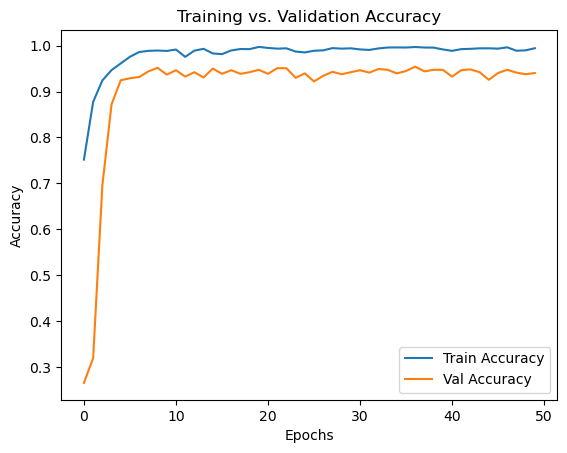

In [15]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [18]:
def plot_accuracy_and_loss(history):
    plt.figure(figsize=(12, 5))
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

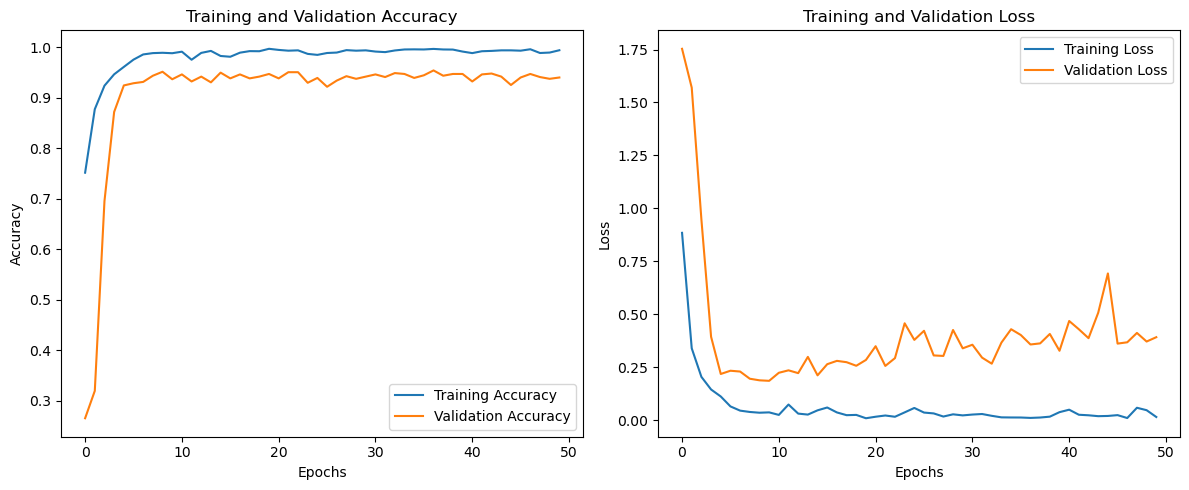

In [19]:
plot_accuracy_and_loss(history)

In [95]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [96]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [97]:
y_pred = cnn_model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = test_generator.classes

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 332ms/step


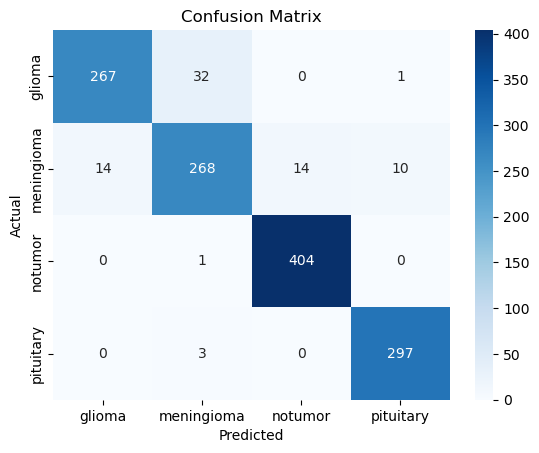

              precision    recall  f1-score   support

      glioma       0.95      0.89      0.92       300
  meningioma       0.88      0.88      0.88       306
     notumor       0.97      1.00      0.98       405
   pituitary       0.96      0.99      0.98       300

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.94      0.94      0.94      1311



In [29]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14840\2394786428.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Accuracy', data=accuracy_df, palette='Blues_d')


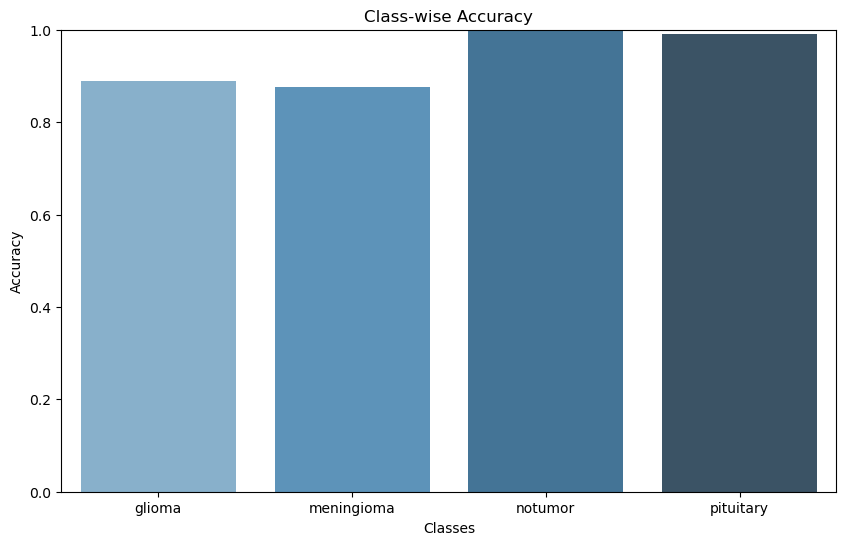

In [40]:
import seaborn as sns

# Create a DataFrame to store class names and accuracy
import pandas as pd
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
class_accuracy = np.diagonal(conf_matrix) / conf_matrix.sum(axis=1)
accuracy_df = pd.DataFrame({
    'Class': class_names,
    'Accuracy': class_accuracy
})

# Plot using Seaborn for better styling
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Accuracy', data=accuracy_df, palette='Blues_d')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.ylim(0, 1)
plt.show()

In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [44]:
accuracy = accuracy_score(y_test, y_pred_classes)

In [45]:
print(accuracy)

0.9427917620137299


In [105]:
y_pred = cnn_model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = test_generator.classes
y_true_bin = lb.fit_transform(y_true)

41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 395ms/step


In [106]:
fpr, tpr, roc_auc = {}, {}, {}

# Assuming y_true_bin and y_pred have shape (num_samples, num_classes)
for i in range(y_true_bin.shape[1]):  # Loop through each class
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])  # Get fpr and tpr for class i
    roc_auc[i] = auc(fpr[i], tpr[i])  # Compute the AUC

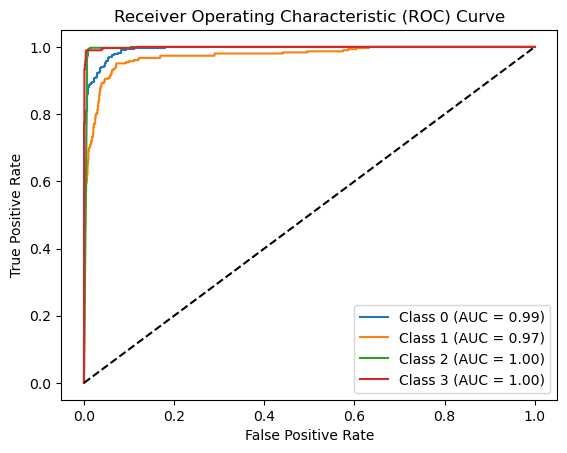

In [107]:
plt.figure()
for i in range(y_true_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()